# CLASSIFY SONG GENRES (HIPHOP, ROCK) FROM AUDIO DATA 

#                                                             DONE BY : Akshara AS 

In [1]:
# Import neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Preparing the dataset

In [2]:
# Reading datasets

tracks = pd.read_csv('datasets/fma-rock-vs-hiphop.csv')
echonest_metrics = pd.read_json('datasets/echonest-metrics.json',precise_float=True)

In [3]:
tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
echonest_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [5]:
# Merge the relevant columns of tracks and echonest_metrics

echo_tracks = pd.merge(echonest_metrics, tracks[['track_id', 'genre_top']], on='track_id')
echo_tracks.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [6]:
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


# Pairwise relationships between continuous variables

In [7]:
# Create a correlation matrix

corr_metrics = echo_tracks.corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


# Normalizing the feature data

In [8]:
# Define the features and labels
features = echo_tracks.drop(['genre_top', 'track_id'], axis = 1)
labels = echo_tracks['genre_top']

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

# Principal Component Analysis on the scaled data

In [9]:
%matplotlib inline

# Get explained variance ratios from PCA using all features

pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_
exp_variance

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

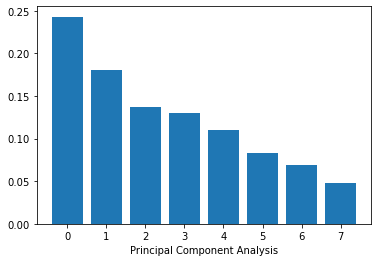

In [10]:
# plot the explained variance using a barplot

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_),exp_variance)
ax.set_xlabel('Principal Component Analysis')
plt.show()

# Visualization of PCA

In [11]:
# Calculate the cumulative explained variance

cum_exp_variance = np.cumsum(exp_variance)
cum_exp_variance

array([0.24297674, 0.4234199 , 0.55992299, 0.68986388, 0.80042636,
       0.88344881, 0.95268664, 1.        ])

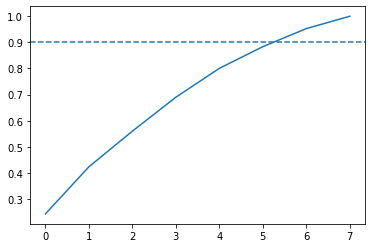

In [12]:
# Plot the cumulative explained variance and draw a dashed line at 0.90.

fig, ax = plt.subplots()
ax.plot(range(8),cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
plt.show()

In [13]:
n_components = 7

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

In [14]:
pca_projection.shape

(4802, 7)

# Train a decision tree to classify genre

In [15]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels,random_state=10)

# Train the decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features,train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_features)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels_tree)

0.8734388009991674

In [17]:
labels.value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

In [18]:
# Data is imbalanced, so here accuracy is not really a good metric. Let's look at the confusion matrix.

from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, pred_labels_tree)

array([[155,  80],
       [ 72, 894]], dtype=int64)

# Compare the decision tree to a logistic regression

In [19]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state = 10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.68      0.66      0.67       235
        Rock       0.92      0.93      0.92       966

    accuracy                           0.87      1201
   macro avg       0.80      0.79      0.80      1201
weighted avg       0.87      0.87      0.87      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.78      0.57      0.66       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.84      0.76      0.79      1201
weighted avg       0.88      0.88      0.88      1201



# Balance our data for greater performance

In [20]:
# Subset only the hip-hop tracks, and then only the rock tracks

hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
hop_only.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
118,583,0.748986,0.765886,0.513173,0.957209,0.614844,0.886914,180.025,0.401672,Hip-Hop


In [21]:
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']
rock_only.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock
5,154,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632,Rock
6,155,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325,Rock
7,169,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347,Rock
8,170,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548,Rock


In [22]:
hop_only.shape, rock_only.shape

((910, 10), (3892, 10))

In [23]:
# sample the rocks songs to be the same number as there are hip-hop songs

rock_only = rock_only.sample(n= hop_only.shape[0])
rock_only.shape, hop_only.shape

((910, 10), (910, 10))

In [24]:
hop_only.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
118,583,0.748986,0.765886,0.513173,0.957209,0.614844,0.886914,180.025,0.401672,Hip-Hop


In [25]:
rock_only.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
1631,11940,0.001922,0.320000,0.728576,0.963126,0.523367,0.049583,149.000,0.678282,Rock
3786,47482,0.888406,0.536120,0.809882,0.943173,0.108382,0.032488,86.055,0.597692,Rock
183,836,0.064008,0.277811,0.914413,0.438198,0.182676,0.050719,90.140,0.306244,Rock
60,338,0.984569,0.460057,0.043614,0.238005,0.102993,0.039791,118.805,0.316105,Rock
2738,28782,0.032474,0.264618,0.765335,0.838666,0.054317,0.032288,130.082,0.308698,Rock


In [26]:
# concatenate the dataframes rock_only and hop_only

rock_hop_bal = pd.concat([rock_only, hop_only])
rock_hop_bal.shape

(1820, 10)

In [27]:
rock_hop_bal.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
1631,11940,0.001922,0.320000,0.728576,0.963126,0.523367,0.049583,149.000,0.678282,Rock
3786,47482,0.888406,0.536120,0.809882,0.943173,0.108382,0.032488,86.055,0.597692,Rock
183,836,0.064008,0.277811,0.914413,0.438198,0.182676,0.050719,90.140,0.306244,Rock
60,338,0.984569,0.460057,0.043614,0.238005,0.102993,0.039791,118.805,0.316105,Rock
2738,28782,0.032474,0.264618,0.765335,0.838666,0.054317,0.032288,130.082,0.308698,Rock


In [28]:
rock_hop_bal.tail()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop
4801,124722,0.153518,0.638660,0.762567,5.000000e-10,0.264847,0.303372,77.842,0.656612,Hip-Hop


In [29]:
# The features, labels, and pca projection are created for the balanced dataframe
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,
                                                                            labels,
                                                                            stratify = labels,
                                                                            random_state=10)

# After balancing the data, comparing decision tree to a logistic regression

In [30]:
# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state = 10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

# Compare the models
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.81      0.77      0.79       227
        Rock       0.78      0.82      0.80       228

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.86      0.80      0.83       227
        Rock       0.82      0.87      0.84       228

    accuracy                           0.84       455
   macro avg       0.84      0.84      0.84       455
weighted avg       0.84      0.84      0.84       455



In [32]:
#Success! Balancing our data has removed bias towards the more prevalent class.

# Evaluate the models by use of cross-validation

In [31]:
from sklearn.model_selection import KFold, cross_val_score

# Set up our K-fold cross-validation
kf = KFold(n_splits=10,random_state=10,shuffle=True)

tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)

# Train our models using KFold cv
tree_score = cross_val_score(tree,pca_projection,labels,cv=kf)
logit_score = cross_val_score(logreg,pca_projection,labels,cv=kf)

# Print the mean of each array of scores
print("Decision Tree:", np.mean(tree_score),
      "Logistic Regression:", np.mean(logit_score))


Decision Tree: 0.787912087912088 Logistic Regression: 0.8510989010989011


In [33]:
#We can see here that our simple Logistic Regression model performed better than the Decision tree model on the balanced Data.